# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [23]:
#import all relevant libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as st
import requests 
import datetime
from api_keys import weather_api_key, g_key
# import citypy to determine city base on lattitude and longitude
from citipy import citipy
from pprint import pprint

file_path = "output_data/cities.csv"

## Generate Cities List

In [24]:
#create lists to hold lat, lng and cities
lat_lngs = []
cities = []

# we can create a set of random latitude (-90 to 90) and longitude (-180 to 180) and use zip function to combine them
lat = np.random.uniform(-90, 90, 2000)
lng = np.random.uniform(-180, 180, 2000)
lat_lngs = zip(lat, lng)

# find the nearest city for each pair of [lat,lng]
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0],lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

len(cities)

770

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [25]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
unit = "imperial"
query = f"{base_url}appid={weather_api_key}&units={unit}&q="
record_counter = 0
set_counter = 1

city_name = []
country = []
lat = []
lng = []
humidity = []
wind_speed = []
cloudiness = []
tempt = []
date = []

for city in cities:
    response = requests.get(f"{query}{city}").json()
    if record_counter < 50:
        record_counter += 1
    else: 
        set_counter += 1
        record_counter = 0
    print(f"Processing record {record_counter} of set {set_counter} | {city}")

    try:
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        tempt.append(response['main']['temp_max'])
        date.append(response['dt'])

    except:
        print(f"City not found. Skipping...")



Processing record 1 of set 1 | pinega
Processing record 2 of set 1 | saldanha
Processing record 3 of set 1 | jamestown
Processing record 4 of set 1 | garowe
Processing record 5 of set 1 | juneau
Processing record 6 of set 1 | marcona
City not found. Skipping...
Processing record 7 of set 1 | hay river
Processing record 8 of set 1 | cockburn town
Processing record 9 of set 1 | ushuaia
Processing record 10 of set 1 | guerrero negro
Processing record 11 of set 1 | puerto escondido
Processing record 12 of set 1 | grand gaube
Processing record 13 of set 1 | cidreira
Processing record 14 of set 1 | danville
Processing record 15 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing record 16 of set 1 | batemans bay
Processing record 17 of set 1 | harrisburg
Processing record 18 of set 1 | borogontsy
Processing record 19 of set 1 | barentsburg
City not found. Skipping...
Processing record 20 of set 1 | yellowknife
Processing record 21 of set 1 | kudahuvadhoo
Processing record 22 o

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:
weather_df = pd.DataFrame({"City": city_name,
                           "Country": country,
                           "Latitude": lat,
                           "Longitude": lng,
                           "Humidity": humidity,
                           "Wind Speed": wind_speed,
                           "Cloudiness": cloudiness,
                           "Temperature": tempt,
                           "Date": date

})
weather_df.head()

,City,Country,Latitude,Longitude,Humidity,Wind Speed,Cloudiness,Temperature,Date
0,Pinega,RU,64.7001,43.3936,44,8.57,100,71.65,1655303927
1,Saldanha,ZA,-33.0117,17.9442,54,3.94,3,62.65,1655303927
2,Jamestown,US,42.0970,-79.2353,83,5.99,36,80.19,1655303665
3,Garoowe,SO,8.4054,48.4845,26,20.87,14,91.09,1655303929
4,Juneau,US,58.3019,-134.4197,93,0.00,75,47.21,1655303716


In [27]:
weather_df.describe()

,Latitude,Longitude,Humidity,Wind Speed,Cloudiness,Temperature,Date
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,7.080000e+02
mean,20.646817,17.150062,65.693503,8.110212,53.550847,70.669237,1.655304e+09
std,32.359335,88.467207,23.290323,5.287842,38.996920,15.369138,1.866623e+02
min,-54.800000,-179.166700,1.000000,0.000000,0.000000,29.440000,1.655303e+09
25%,-5.698775,-62.548350,52.000000,4.090000,14.000000,58.715000,1.655304e+09
50%,26.608750,20.308950,71.000000,6.920000,54.000000,73.440000,1.655304e+09
75%,47.313400,91.748100,83.250000,11.105000,97.000000,81.510000,1.655304e+09
max,78.218600,178.416700,100.000000,30.800000,100.000000,114.750000,1.655305e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [28]:
weather_df[weather_df['Humidity'] > 100].count()

City           0
Country        0
Latitude       0
Longitude      0
Humidity       0
Wind Speed     0
Cloudiness     0
Temperature    0
Date           0
dtype: int64

In [29]:
#  Get the indices of cities that have humidity over 100%.


In [30]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [31]:

# Export to .csv file
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

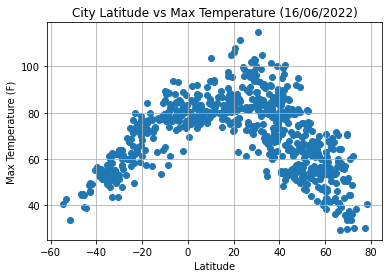

In [32]:
x = weather_df['Latitude']
y = weather_df['Temperature']
date =datetime.datetime.fromtimestamp(int(weather_df['Date'][0])).strftime('%d/%m/%Y')
plt.scatter(x, y)
plt.title(f'City Latitude vs Max Temperature ({date})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("../Images/lat_temp.png")

From the plot that shows the relationship between city latidue and temerature, as we approaching the equator (latitude = 0) the temperature get hotter

## Latitude vs. Humidity Plot

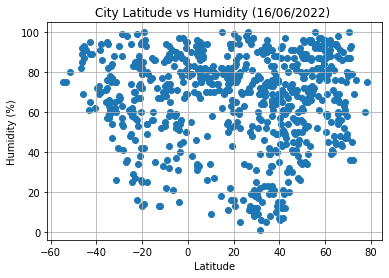

In [33]:
plt.scatter(weather_df['Latitude'], weather_df['Humidity'])
plt.title(f'City Latitude vs Humidity ({date}) ')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/lat_humidity.png")

There is no correlation between city latitude and humidity

## Latitude vs. Cloudiness Plot

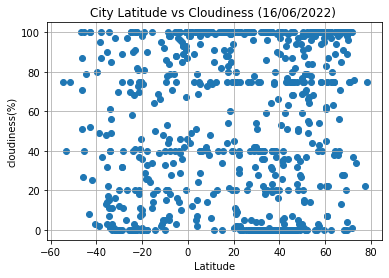

In [34]:
plt.scatter(weather_df['Latitude'], weather_df['Cloudiness'])
plt.title(f'City Latitude vs Cloudiness ({date}) ')
plt.xlabel('Latitude')
plt.ylabel('cloudiness(%)')
plt.grid()
plt.savefig("../Images/lat_cloudiness.png")

There is no correlation between city latitude and cloudiness level

## Latitude vs. Wind Speed Plot

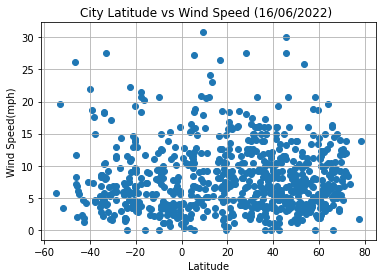

In [35]:
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'])
plt.title(f"City Latitude vs Wind Speed ({date}) ")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig("../Images/lat_windspeed.png")

Generally, wind speed become as greater as futher away from the equator

## Linear Regression

In [36]:
#create northern and southern hemisphere df by creating a border for them
border = weather_df['Latitude'] > 0
northern_hem = weather_df[border]
southern_hem = weather_df[~border]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6875628703070247 


Text(0, 0.5, 'Max Temp')

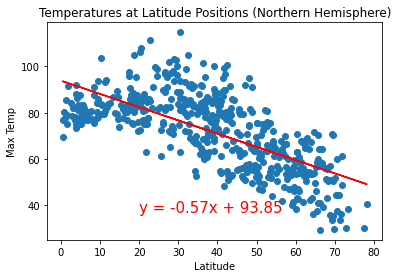

In [37]:
x = northern_hem['Latitude']
y = northern_hem['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Temperatures at Latitude Positions (Northern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.85958853092346 


Text(0, 0.5, 'Max Temp')

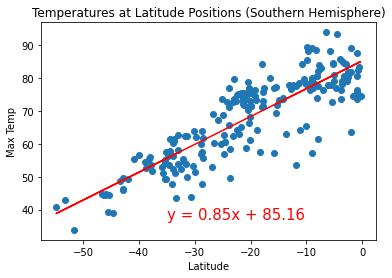

In [38]:
x = southern_hem['Latitude']
y = southern_hem['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Temperatures at Latitude Positions (Southern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(-35,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

From the analysis, both Northern with r-value equal -0.67 shows a relatively strong negative relationship between the city latitude and temerature. On the other hand Southern hemesphere (r-value = 0.81) indicate a strong potive reationship between latitude and temperature. Both plots shows that the closer the latitude to the equator, the hotter it get. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.04322461367137663 


Text(0, 0.5, 'Humidity (%)')

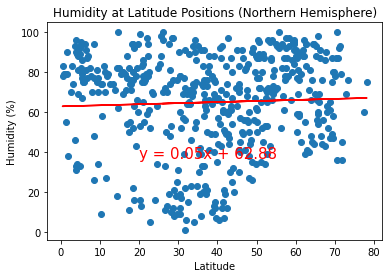

In [39]:
x = northern_hem['Latitude']
y = northern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Humidity at Latitude Positions (Northern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.11554394162553772 


Text(0, 0.5, 'Humidity (%)')

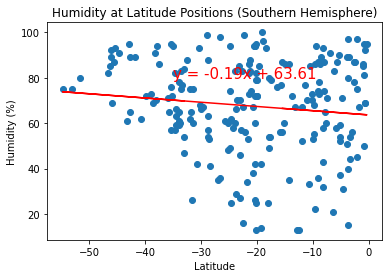

In [40]:
x = southern_hem['Latitude']
y = southern_hem['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Humidity at Latitude Positions (Southern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(-35,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

There is no correlation between latitude and humidity for both hemesphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.02989616224578737 


Text(0, 0.5, 'Cloudiness (%)')

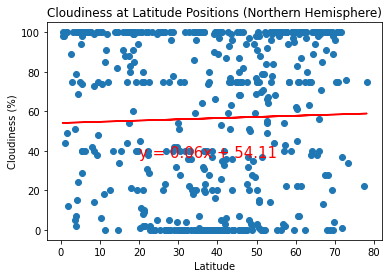

In [41]:
x = northern_hem['Latitude']
y = northern_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Cloudiness at Latitude Positions (Northern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.13136227982863838 


Text(0, 0.5, 'Cloudiness (%)')

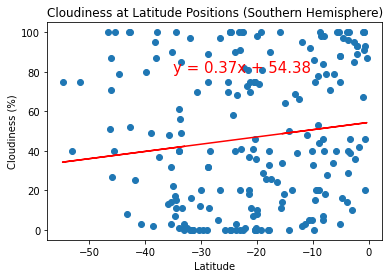

In [42]:
x = southern_hem['Latitude']
y = southern_hem['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Cloudiness at Latitude Positions (Southern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(-35,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

From the plots, city latitude and the level of cloudiness deos not seem to be correlated. However, the Southern hemsphere shows a weak potive realtionship between latidue the level of cloudiness. There is more cloudy as we move toward the equator

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.09017031615955493 


Text(0, 0.5, 'Wind Speed (%)')

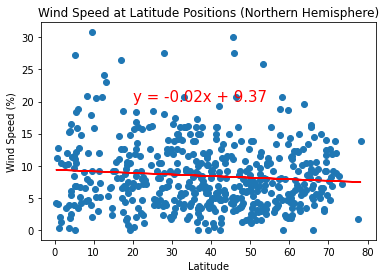

In [43]:
x = northern_hem['Latitude']
y = northern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Wind Speed at Latitude Positions (Northern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.13932598825978743 


Text(0, 0.5, 'Wind Speed (%)')

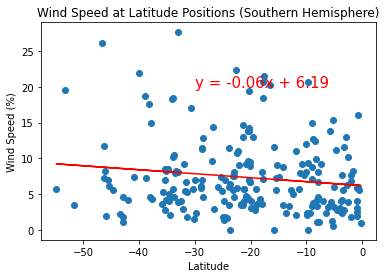

In [44]:
x = southern_hem['Latitude']
y = southern_hem['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regression = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
coor = st.pearsonr(x,y)
print(f"The r-value is: {coor[0]} ")

plt.scatter(x, y)
plt.title('Wind Speed at Latitude Positions (Southern Hemisphere)')
plt.plot(x, regression, "r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (%)')

There is no correlation between the latitude and wind speed

In conclusion, The weather become warmer as we 're approaching the equator. The Southern Hermesphere has a strong positive linear correlation between latitude and temerature
Also, there is no correlation between the city latitude against humidity, cloudiness and wind speed